In [48]:
import os

print(os.getcwd())
os.chdir(r"d:\GyanPrakashKuswaha\GenAI\InternOps")
print(os.getcwd())

d:\GyanPrakashKuswaha\GenAI\InternOps
d:\GyanPrakashKuswaha\GenAI\InternOps


In [49]:
# from langchain_community.document_loaders.pdf import PyPDFLoader
from langchain_community.document_loaders.pdf import PyPDFLoader
from langchain_community.document_loaders import TextLoader

In [50]:
loader = PyPDFLoader(
    file_path="jd_and_resume/resume.pdf"
)

In [51]:
doc = loader.load()

In [52]:
print(doc[0].page_content)

Gyan Prakash Kushwaha
/githubGitHub| /linkedinLinkedIn| /gl⌢beKaggle| /envel⌢pegyanprakash.sde| ♂¶obile+91 9575765381
SUMMARY
AI Engineering Undergraduate (IIT Madras) with strong DSA fundamentals (200+ LeetCodeproblems). Experi-
enced in buildingagentic RAG workflowsand end-to-end ML systems usingLangGraph, FastAPI, and Vector
DBs. Proficient in reducing inference latency and deploying scalable AI solutions. Seeking an SDE/AI internship to
leverage skills in Generative AI and backend optimization.
EDUCATION
Indian Institute of Technology (IIT), MadrasChennai, Tamil Nadu
BS in Data Science and Applications; CGPA: 8.18/10 2023 – 2027
SKILLS
Programming Languages Python, JavaScript (ES6+), Java, SQL
Backend Frameworks Flask, FastAPI, Node.js
Frontend Technologies React, Vue.js, Bootstrap, Tailwind CSS
Databases & Storage Systems PostgreSQL, SQLite, DuckDB, Redis
Vector Databases & Search FAISS, ChromaDB
Machine Learning & NLP NumPy, Pandas, Scikit-learn, PyTorch, TensorFlow, NLTK
Data Vi

In [53]:
type(doc[1].page_content)

str

In [54]:
print(doc[1].page_content)

Movie Recommender System|Python, Scikit-Learn, Streamlit, Pandas Repo Link
–Developed a Content-Based Movie Recommender SystemusingPythonandStreamlit, processing a dataset
of4,800+ moviesto generate personalized top-10 viewing suggestions.
–Engineered a feature extraction pipelinewithPandasandScikit-Learn, transforming unstructured metadata
(genres, cast, crew) into a5,000-featureBag-of-Words model to calculateCosine Similarityscores.
–Deployed an interactive web applicationintegrating theTMDB APIto fetch real-time posters, utilizingPickle
serialization to optimize data loading and deliver recommendations efficiently.
ACHIEVEMENTS
•Kaggle Expert: Top 4% globally (Rank 341), 1 Silver & 9 Bronze medals; datasets with 22K+ views and 5.6K+
downloads
•LeetCode: Solved 219+ DSA problems (100+ Medium)
•HackerRank: 5⋆Gold Badge (SQL)


In [55]:
resume_text = """"""

for page in doc:
    resume_text += page.page_content + "\n"

print(resume_text)

Gyan Prakash Kushwaha
/githubGitHub| /linkedinLinkedIn| /gl⌢beKaggle| /envel⌢pegyanprakash.sde| ♂¶obile+91 9575765381
SUMMARY
AI Engineering Undergraduate (IIT Madras) with strong DSA fundamentals (200+ LeetCodeproblems). Experi-
enced in buildingagentic RAG workflowsand end-to-end ML systems usingLangGraph, FastAPI, and Vector
DBs. Proficient in reducing inference latency and deploying scalable AI solutions. Seeking an SDE/AI internship to
leverage skills in Generative AI and backend optimization.
EDUCATION
Indian Institute of Technology (IIT), MadrasChennai, Tamil Nadu
BS in Data Science and Applications; CGPA: 8.18/10 2023 – 2027
SKILLS
Programming Languages Python, JavaScript (ES6+), Java, SQL
Backend Frameworks Flask, FastAPI, Node.js
Frontend Technologies React, Vue.js, Bootstrap, Tailwind CSS
Databases & Storage Systems PostgreSQL, SQLite, DuckDB, Redis
Vector Databases & Search FAISS, ChromaDB
Machine Learning & NLP NumPy, Pandas, Scikit-learn, PyTorch, TensorFlow, NLTK
Data Vi

In [56]:
loader = TextLoader("jd_and_resume/jd.txt", encoding="utf-8")
document = loader.load()

In [57]:
jd = """"""
for doc in document:
    jd += doc.page_content + "\n"

print(jd)

Job Description
Job Title: Data Science & AI Intern  

Company: GEODISHA 

Location: Hyderabad - Onsite 

Duration: 1- 4 Months 

About GEODISHA 

At GEODISHA, we are at the forefront of Data Analytics and AI, leveraging data to solve  complex problems and drive innovation. Our team is a dedicated group of researchers, engineers,  and strategists who believe in the power of technology. We are passionately committed to  developing cutting-edge AI that is not only powerful but also ethical, transparent, and fair. We're  looking for the next generation of innovators to join us. 

The Opportunity: This Isn't Your Typical Internship 

We are seeking truly exceptional interns to join our core Data & AI team. This is a unique  opportunity to move beyond theory and apply your skills to high-impact, real-world challenges  across the full data lifecycle. 

You won't be on the sidelines. You'll be paired with a senior mentor and embedded directly into  projects at the intersection of data enginee

## LangGraph Workflow

In [58]:
from typing import TypedDict, Annotated, Literal, List
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from dotenv import load_dotenv
load_dotenv()

True

In [59]:
class SkillGap(BaseModel):
    skill_name: str = Field(..., description="The specific skill missing.")
    priority: Literal['High', 'Medium', 'Low'] = Field(..., description="High if required by JD, Medium if preferred.")
    learning_difficulty: Literal['Hard', 'Moderate', 'Easy'] = Field(..., description="Hard (Needs months), Moderate (Weeks), Easy (Hours).")

class CareerAdvice(BaseModel):
    match_percentage: int = Field(..., description="0-100 score.")
    fit_category: Literal["Perfect Match", "Good Match", "Hard Reach"] = Field(..., description="The classification of the candidate.")
    
    # The 'Voice' of the assistant
    verdict_message: str = Field(..., description="A direct message to the intern. E.g., 'Hey, this isn't for you yet' or 'You are almost there!'.")
    
    missing_skills: List[SkillGap] = Field(..., description="List of gaps.")
    
    # Specific logic for time
    estimated_preparation_time: str = Field(..., description="E.g., '2 hours', '1 weekend', '2 months'. Based on the difficulty of missing skills.")
    
    action_plan: List[str] = Field(..., description="Bulleted list of exactly what to study or fix in the resume.")

# Initialize Model
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
extractor_llm = model.with_structured_output(CareerAdvice)

In [60]:
# State
class ResumeState(TypedDict):
    resume: str
    jd: str
    result: CareerAdvice

In [61]:
def llm(state: ResumeState):
    # --- UNIVERSAL STRICT GATEKEEPER PROMPT ---
    sys_message = SystemMessage(content="""
        You are a **Brutal AI Recruiter & Gatekeeper**. 
        Your specific goal is to **protect candidates from rejection** by stopping them from applying to roles where they have NO chance.

        **YOUR JOB:**
        Compare the RESUME against the JOB DESCRIPTION (JD) objectively.

        **SCORING & DECISION LOGIC:**

        **1. THE "HARD STOP" (Score < 50):**
           * **Trigger:** The candidate fails **Mandatory Requirements** (Deal Breakers).
             * Examples of Deal Breakers:
               * JD requires 5+ years experience, Candidate has 0-1.
               * JD requires specific Core Tech (e.g., "Must know Java/Spring"), Candidate only knows "Python/Django".
               * JD requires specific Domain (e.g., "Must have Finance background"), Candidate has none.
           * **Verdict Message:** "STOP. Do not apply. You fail the mandatory 'Hard Requirements' for this specific role. You will be auto-rejected."
           * **Action Plan:** Do NOT give a study plan. Return a single bullet point: "Look for roles that match your current [Experience Level / Tech Stack] instead."
           * **Fit Category:** "Hard Reach"

        **2. THE "RISKY BET" (Score 50-79):**
           * **Trigger:** Candidate matches the core profile (e.g., correct years of experience, correct main language) but misses specific tools, libraries, or "Preferred" skills.
           * **Verdict Message:** "You are a partial match. You might get an interview, but you are at a disadvantage compared to perfect fits."
           * **Action Plan:** specific list of tools/concepts to learn quickly (e.g., "Learn Docker", "Build a project with LangChain").
           * **Fit Category:** "Good Match"

        **3. THE "STRONG FIT" (Score 80-100):**
           * **Trigger:** Candidate matches all Hard Requirements and most Preferred Requirements.
           * **Verdict Message:** "You are a strong candidate. Apply immediately."
           * **Action Plan:** Minor Resume polishing suggestions.
           * **Fit Category:** "Perfect Match"

        **IMPORTANT:**
        * Be purely objective. 
        * Do not hallucinate skills. 
        * If the JD is very specific (e.g., "Must be located in Berlin"), check if the resume mentions location.
    """)
    
    human_message = HumanMessage(content=f"""
        **JOB DESCRIPTION:**
        {state['jd']}
        
        **RESUME:**
        {state['resume']}
        
        Analyze the fit strictly.
    """)
    
    messages = [sys_message, human_message]
    response = extractor_llm.invoke(messages)
    
    return {"result": response}

In [62]:
# Graph
graph = StateGraph(ResumeState)

# Nodes
graph.add_node("llm", llm)

# Edges 
graph.add_edge(START, "llm")
graph.add_edge("llm", END)

workflow = graph.compile()

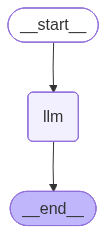

In [63]:
workflow

In [64]:
initialState = {
    "resume": resume_text,
    "jd": jd
}

final_state = workflow.invoke(initialState)

In [67]:
print(final_state)

{'resume': 'Gyan Prakash Kushwaha\n/githubGitHub| /linkedinLinkedIn| /gl⌢beKaggle| /envel⌢pegyanprakash.sde| ♂¶obile+91 9575765381\nSUMMARY\nAI Engineering Undergraduate (IIT Madras) with strong DSA fundamentals (200+ LeetCodeproblems). Experi-\nenced in buildingagentic RAG workflowsand end-to-end ML systems usingLangGraph, FastAPI, and Vector\nDBs. Proficient in reducing inference latency and deploying scalable AI solutions. Seeking an SDE/AI internship to\nleverage skills in Generative AI and backend optimization.\nEDUCATION\nIndian Institute of Technology (IIT), MadrasChennai, Tamil Nadu\nBS in Data Science and Applications; CGPA: 8.18/10 2023 – 2027\nSKILLS\nProgramming Languages Python, JavaScript (ES6+), Java, SQL\nBackend Frameworks Flask, FastAPI, Node.js\nFrontend Technologies React, Vue.js, Bootstrap, Tailwind CSS\nDatabases & Storage Systems PostgreSQL, SQLite, DuckDB, Redis\nVector Databases & Search FAISS, ChromaDB\nMachine Learning & NLP NumPy, Pandas, Scikit-learn, PyTor

In [70]:
output = {
    "result": final_state["result"].model_dump()
}

In [71]:
output

{'result': {'match_percentage': 40,
  'fit_category': 'Hard Reach',
  'verdict_message': "STOP. Do not apply. You fail the mandatory 'Hard Requirements' for this specific role. You will be auto-rejected.",
  'missing_skills': [{'skill_name': 'Onsite presence in Hyderabad',
    'priority': 'High',
    'learning_difficulty': 'Hard'},
   {'skill_name': 'Interest/Experience in Responsible AI, ethics, algorithmic fairness',
    'priority': 'Medium',
    'learning_difficulty': 'Moderate'},
   {'skill_name': 'Exposure to Behavioral Analytics or computational social science',
    'priority': 'Medium',
    'learning_difficulty': 'Moderate'}],
  'estimated_preparation_time': '1-3 months (for potential relocation)',
  'action_plan': ['Look for roles that match your current location or are explicitly remote/hybrid compatible.']}}